<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Machine Learning - Cars4u</center></h1>

<center><img src="https://images.pexels.com/photos/164634/pexels-photo-164634.jpeg" width="1080" height="500"></center>

<b><h2><center> Used Car Price Prediction </center></h2></b>

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

- Brand: brand name of the car
- Model Name: model name of the car
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# loading the dataset
data = pd.read_csv("/content/used_cars_data.csv")

## Data Overview

### Displaying the first few rows of the dataset

In [ ]:
data.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010            72000.0       CNG       Manual      First   
1        Pune  2015            41000.0    Diesel       Manual      First   
2     Chennai  2011            46000.0    Petrol       Manual      First   
3     Chennai  2012            87000.0    Diesel       Manual      First   
4  Coimbatore  2013            40670.0    Diesel    Automatic     Second   

   Seats  New_Price  Price  mileage_num  engine_num  power_num    Brand  \
0    5.0       5.51   1.75        26.60       998.0      58.16   maruti   
1    5.0      16.06  12.50        19.67      1582.0     126.20  hyundai   
2    5.0       8.61   4.50        18.20      1199.0      88.70    honda   
3    7.0      11.27   6.00        20.77      1248.0      88.76   maruti   
4    5.0      53.14  17.74        15.20      1968.0     140.80     audi   

    Model  
0   wagon  
1   creta  
2    jazz  
3  ertiga  
4      a4

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7252 rows and 14 columns.


### Checking 10 random rows of the dataset

In [ ]:
# let's view a sample of the data
data.sample(n=10)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
6443       Pune  2009           120000.0    Petrol    Automatic      First   
3436     Jaipur  2007           140000.0    Petrol       Manual      First   
6146  Hyderabad  2015            40000.0    Diesel    Automatic      First   
1465  Hyderabad  2012            85112.0    Diesel       Manual      First   
3161      Kochi  2019            14857.0    Diesel    Automatic      First   
5651  Bangalore  2013            66700.0    Petrol       Manual      First   
5086  Hyderabad  2013            68434.0    Diesel       Manual      First   
4147      Kochi  2017            54758.0    Diesel       Manual      First   
1134  Bangalore  2010            83000.0    Petrol    Automatic      First   
3976     Mumbai  2015           102000.0    Diesel       Manual      First   

      Seats  New_Price  Price  mileage_num  engine_num  power_num  \
6443    5.0      13.58    NaN        11.70      2354.0     177.60   
3436    5.0      11.30   0.90        15.26      1150.0      74.90   
6146    5.0      54.43    NaN        19.59      1995.0     184.00   
1465    5.0       7.88   3.39        23.20      1248.0      73.94   
3161    5.0      41.98  31.55        20.70      1496.0     113.98   
5651    5.0      14.22   4.00        15.00      1598.0     103.50   
5086    5.0       9.14   5.50        28.40      1248.0      73.75   
4147    5.0       8.58   6.67        28.40      1248.0      73.75   
1134    5.0      86.97  16.50        10.93      2497.0     204.00   
3976    7.0      24.01   8.25        12.99      2494.0     100.60   

              Brand    Model  
6443          honda   accord  
3436      chevrolet     aveo  
6146            bmw        3  
1465         maruti     ritz  
3161           mini   cooper  
5651          skoda    rapid  
5086         maruti    dzire  
4147         maruti    dzire  
1134  mercedes-benz  e-class  
3976         toyota   innova

**Observations**


In [ ]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [ ]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   New_Price          7252 non-null   float64
 8   Price              6019 non-null   float64
 9   mileage_num        7169 non-null   float64
 10  engine_num         7206 non-null   float64
 11  power_num          7077 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 793.3+ KB


In [ ]:
df.isna().sum()

Location                0
Year                    0
Kilometers_Driven       1
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price               0
Price                1233
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

In [ ]:
df.dropna(subset='Kilometers_Driven', inplace=True)

In [ ]:
df.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price               0
Price                1233
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

In [ ]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'New_Price', 'Price', 'mileage_num',
       'engine_num', 'power_num', 'Brand', 'Model'],
      dtype='object')

### Checking for duplicate values

In [ ]:
# checking for duplicate values
df.duplicated().sum()

2

- There are two duplicate value in the data.
- Let's take a closer look at it.

In [ ]:
df[df.duplicated(keep=False) == True]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
3623  Hyderabad  2007            52195.0    Petrol       Manual      First   
4781  Hyderabad  2007            52195.0    Petrol       Manual      First   
6940    Kolkata  2017            13000.0    Diesel       Manual      First   
7077    Kolkata  2017            13000.0    Diesel       Manual      First   

      Seats  New_Price  Price  mileage_num  engine_num  power_num   Brand  \
3623    5.0       4.36   1.75         19.7       796.0       46.3  maruti   
4781    5.0       4.36   1.75         19.7       796.0       46.3  maruti   
6940    5.0      13.58    NaN         26.0      1498.0       98.6   honda   
7077    5.0      13.58    NaN         26.0      1498.0       98.6   honda   

     Model  
3623  alto  
4781  alto  
6940  city  
7077  city

**Observations**

- There is a good chance that two cars of the same build were sold in the same location.
- But it is highly unlikely that both of them will have the same number of kilometers driven.
- So, we will drop the row which occurs second.

In [ ]:
df.drop(4781, inplace=True)
df.drop(6940, inplace=True)

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

In [ ]:
df.describe().T

count          mean           std      min       25%  \
Year               7249.0   2013.365706      3.253660  1996.00   2011.00   
Kilometers_Driven  7249.0  57818.610843  37503.482838   171.00  34000.00   
Seats              7196.0      5.280573      0.809475     2.00      5.00   
New_Price          7249.0     21.307134     24.258608     3.91      7.88   
Price              6017.0      9.471526     11.166410     0.44      3.50   
mileage_num        7166.0     18.345790      4.157932     6.40     15.30   
engine_num         7203.0   1616.529363    595.147643    72.00   1198.00   
power_num          7074.0    112.755341     53.474661    34.20     75.00   

                        50%       75%        max  
Year                2014.00   2016.00    2019.00  
Kilometers_Driven  53442.00  73000.00  775000.00  
Seats                  5.00      5.00      10.00  
New_Price             11.30     21.69     375.00  
Price                  5.64      9.95     160.00  
mileage_num           18.20     21.10      33.54  
engine_num          1493.00   1968.00    5998.00  
power_num             94.00    138.10     616.00

In [ ]:
df.sort_values(by='Kilometers_Driven', ascending=False)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
340   Kolkata  2013           775000.0    Diesel    Automatic      First   
1860  Chennai  2013           720000.0    Diesel       Manual      First   
358   Chennai  2009           620000.0    Petrol       Manual      First   
2823  Chennai  2015           480000.0    Diesel    Automatic      First   
3092  Kolkata  2015           480000.0    Petrol       Manual      First   
...       ...   ...                ...       ...          ...        ...   
5339     Pune  2019             1000.0    Petrol       Manual      First   
6201  Kolkata  2019             1000.0    Petrol       Manual      First   
1242    Delhi  2018             1000.0    Diesel    Automatic      First   
5606   Mumbai  2019              600.0    Petrol    Automatic      First   
1361   Mumbai  2019              171.0    Petrol       Manual      First   

      Seats  New_Price  Price  mileage_num  engine_num  power_num       Brand  \
340     5.0      25.83   7.50        19.30      1968.0     141.00       skoda   
1860    5.0      13.23   5.90        20.54      1598.0     103.60  volkswagen   
358     5.0      10.25   2.70        20.36      1197.0      78.90     hyundai   
2823    5.0      10.15  13.00        16.96      1968.0     138.03  volkswagen   
3092    5.0      13.58   5.00        17.40      1497.0     117.30       honda   
...     ...        ...    ...          ...         ...        ...         ...   
5339    5.0      10.25   8.60        17.19      1197.0      81.86     hyundai   
6201    5.0       3.99    NaN        24.70       796.0      47.30      maruti   
1242    5.0      52.77  40.00        13.60      1999.0     177.00      jaguar   
5606    5.0       6.80   6.25        21.50      1197.0      81.80      maruti   
1361    5.0       4.36   3.60        24.70       796.0      47.30      maruti   

        Model  
340   octavia  
1860    vento  
358       i10  
2823    jetta  
3092     city  
...       ...  
5339      i20  
6201     alto  
1242       xe  
5606    wagon  
1361     alto  

[7249 rows x 14 columns]

In [ ]:
775000.0 / (365*6)

353.8812785388128

In [ ]:
catcols = ['Fuel_Type', 'Transmission',
       'Owner_Type', 'Location', 'Brand', 'Model']
for col in catcols:
  print(f"Column is {col}")
  print(df[col].value_counts())

Column is Fuel_Type
Fuel_Type
Diesel      3850
Petrol      3323
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
Column is Transmission
Transmission
Manual       5201
Automatic    2048
Name: count, dtype: int64
Column is Owner_Type
Owner_Type
First             5948
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64
Column is Location
Location
Mumbai        948
Hyderabad     875
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       653
Chennai       590
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
Column is Brand
Brand
maruti           1443
hyundai          1340
honda             741
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land   

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

In [ ]:
# creating a copy of the dataframe
df1 = df.copy()

#### `Price`

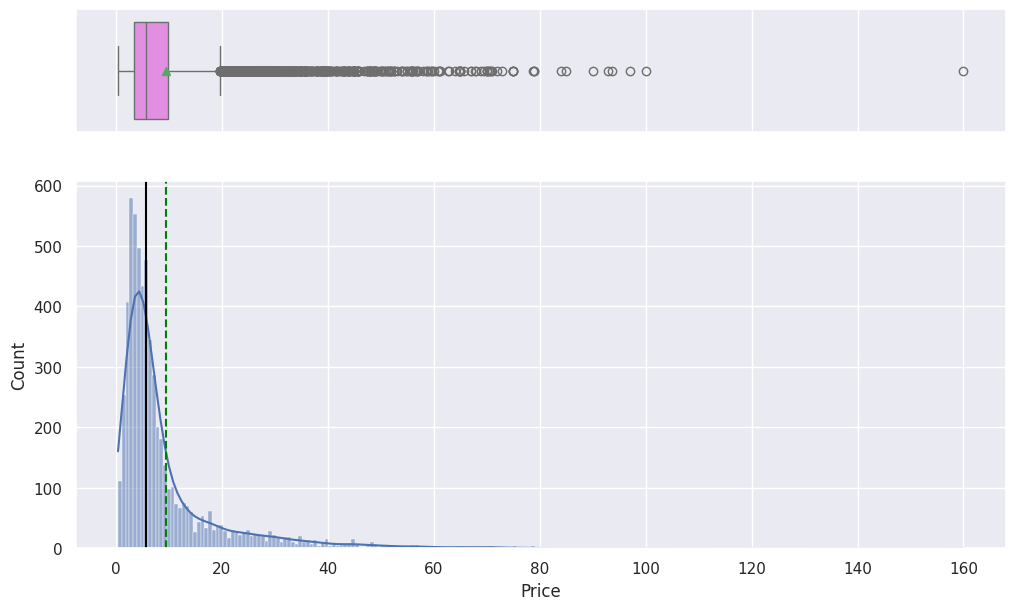

In [ ]:
histogram_boxplot(df1, "Price", kde=True)

**Observations**

* This is a highly skewed distribution.


#### `New_Price`

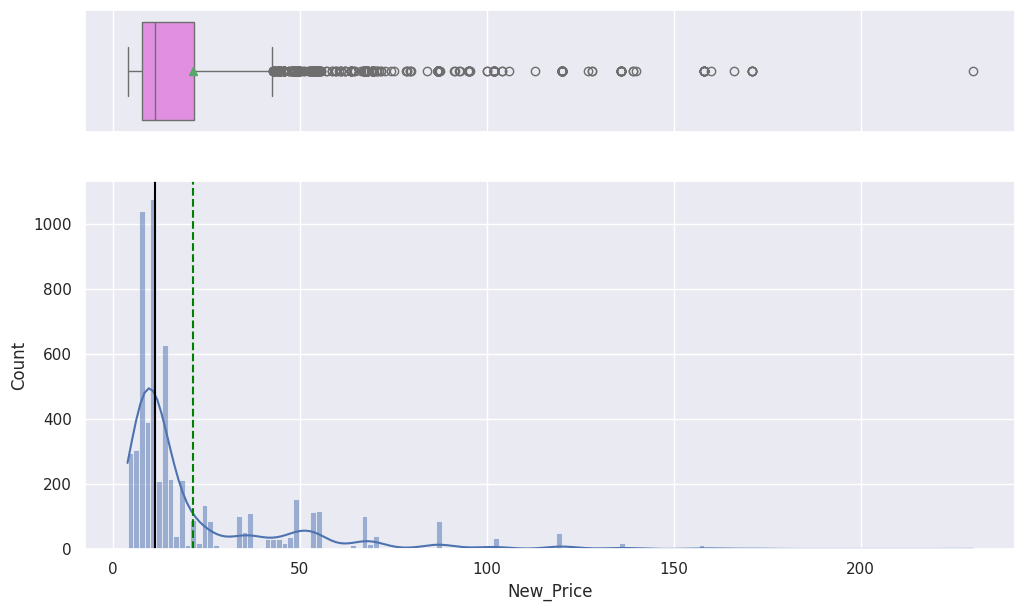

In [ ]:
histogram_boxplot(df1, "New_Price", kde=True)

**Observations**

* This is another highly skewed distribution.


#### `Brand`

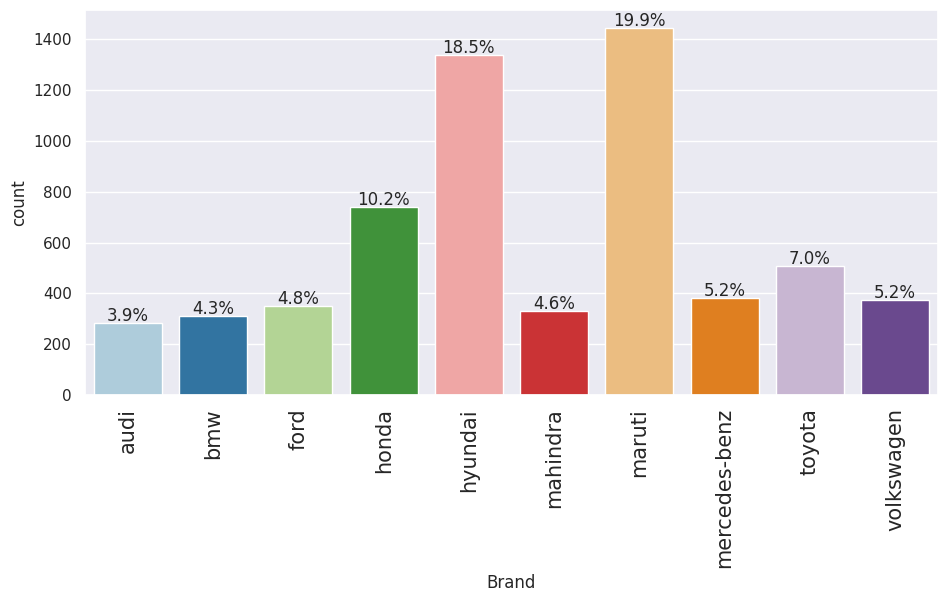

In [ ]:
labeled_barplot(df1, "Brand", perc=True, n=10)

* Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc.

#### `Location`

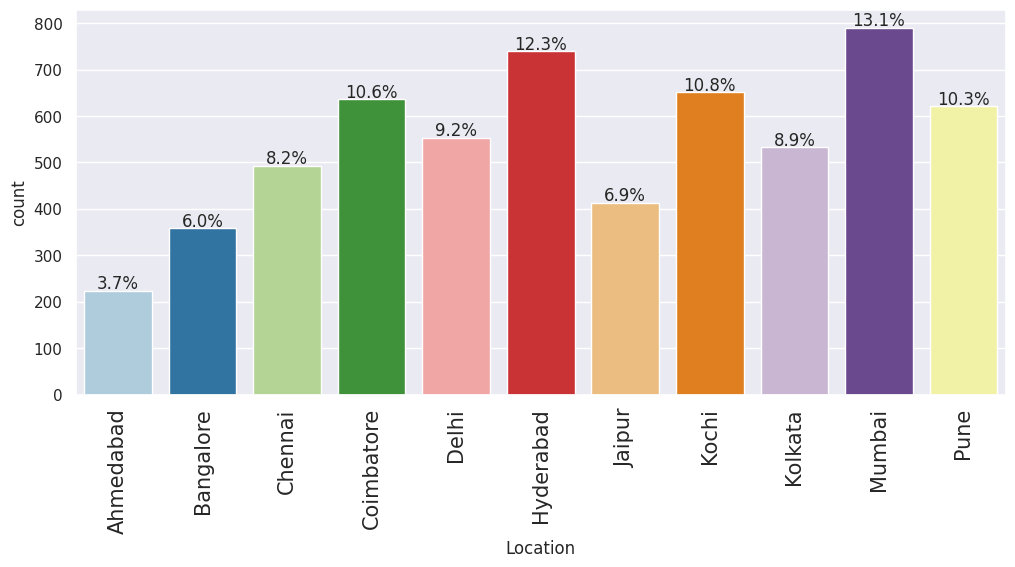

In [ ]:
labeled_barplot(df1, "Location", perc=True)

* Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.

#### `Fuel_Type`

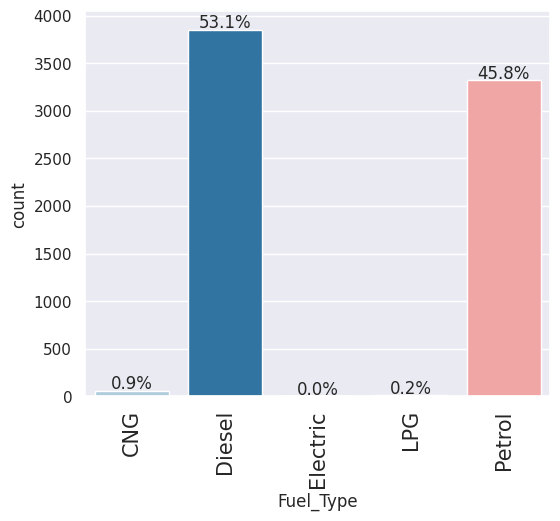

In [ ]:
labeled_barplot(df1, "Fuel_Type", perc=True)

* Around 1% of the cars in the dataset do not run on diesel or petrol.

### Bivariate Analysis

In [ ]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'New_Price', 'Price', 'mileage_num',
       'engine_num', 'power_num', 'Brand', 'Model'],
      dtype='object')

In [ ]:
df['age'] = 2019 - df['Year']

In [ ]:
del df['Year']

#### Correlation Check

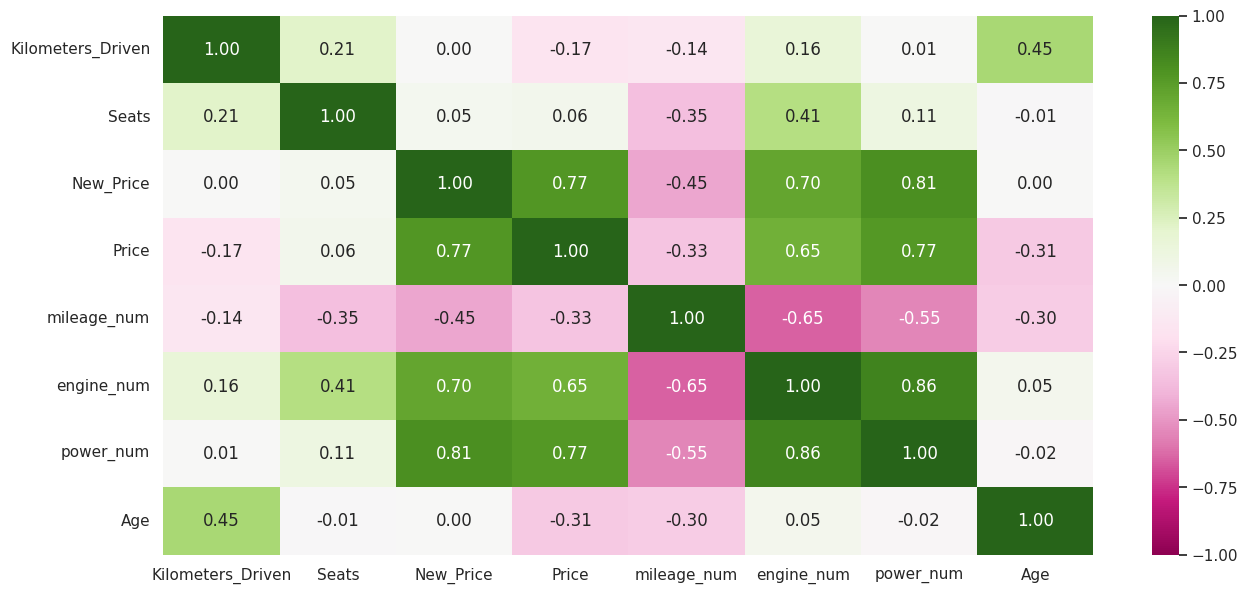

In [ ]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="PiYG"
)
plt.show()

In [ ]:
df.drop(['Kilometers_Driven', 'Seats'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'New_Price',
       'Price', 'mileage_num', 'engine_num', 'power_num', 'Brand', 'Model',
       'age'],
      dtype='object')

In [ ]:
df.isna().sum()

Location           0
Fuel_Type          0
Transmission       0
Owner_Type         0
New_Price          0
Price           1232
mileage_num       83
engine_num        46
power_num        175
Brand              0
Model              0
age                0
dtype: int64

In [ ]:
df.dropna(subset='Price', inplace=True)

In [ ]:
df.isna().sum()

Location          0
Fuel_Type         0
Transmission      0
Owner_Type        0
New_Price         0
Price             0
mileage_num      70
engine_num       36
power_num       143
Brand             0
Model             0
age               0
dtype: int64

**Observations**

* `Power` and `Engine` are important predictors of used car price, but they are also highly correlated to each other.
* The price of a new car of the same model seems to be an important predictor of the used car price, which makes sense.

In [ ]:
df.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'New_Price', 'Price', 'mileage_num', 'engine_num',
       'power_num', 'Brand', 'Model', 'Age'],
      dtype='object')

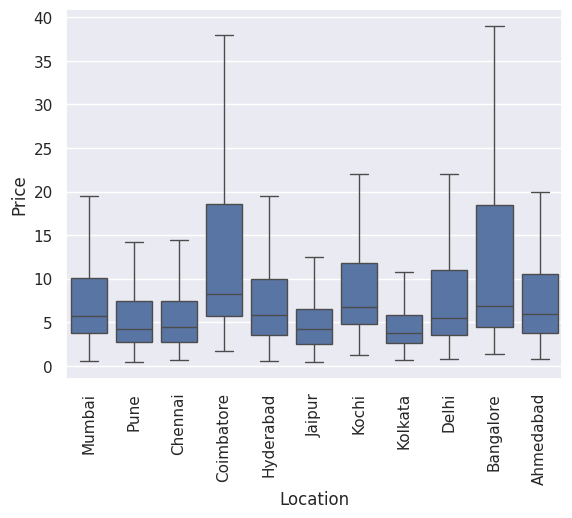

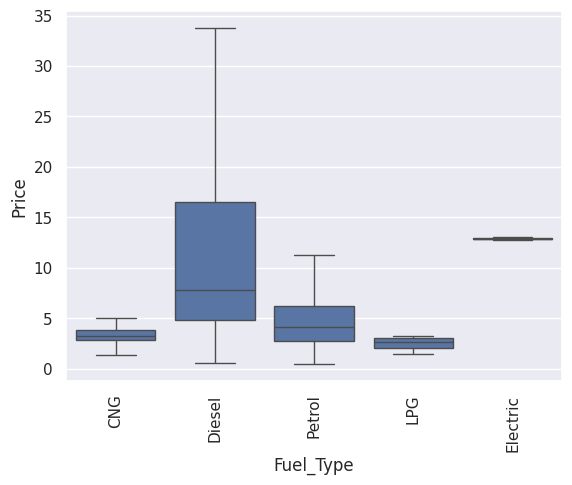

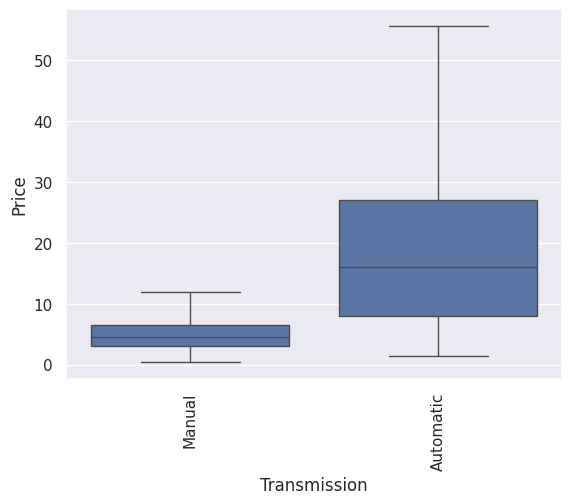

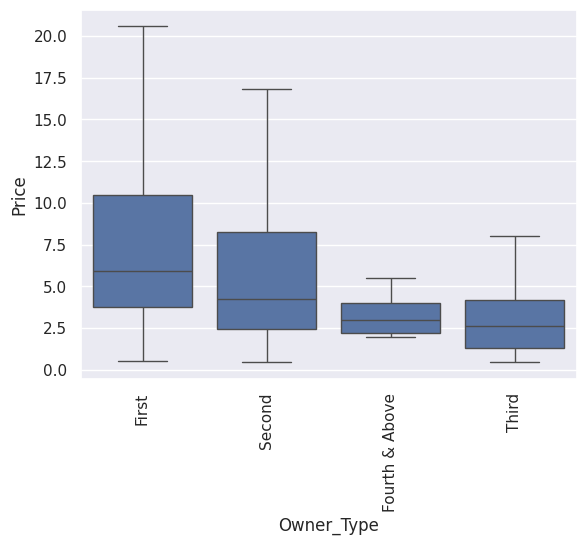

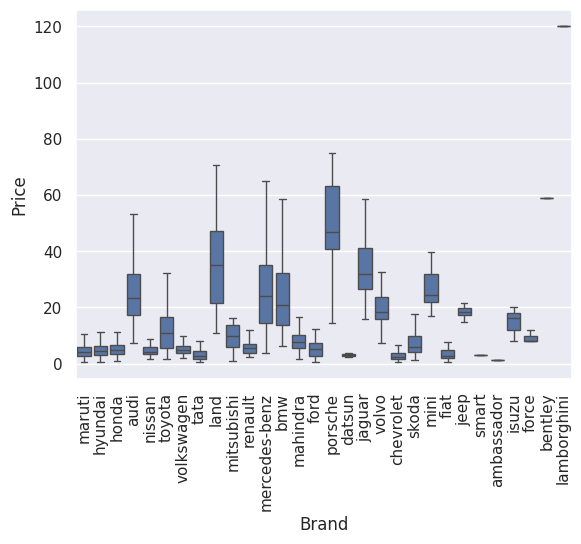

In [ ]:
catcols = ['Location','Fuel_Type', 'Transmission',
       'Owner_Type', 'Brand' ]
for col in catcols:
  sns.boxplot(x=col, y='Price', data=df, showfliers=False)
  plt.xticks(rotation=90)
  plt.show()

#### `Price` vs `Location`

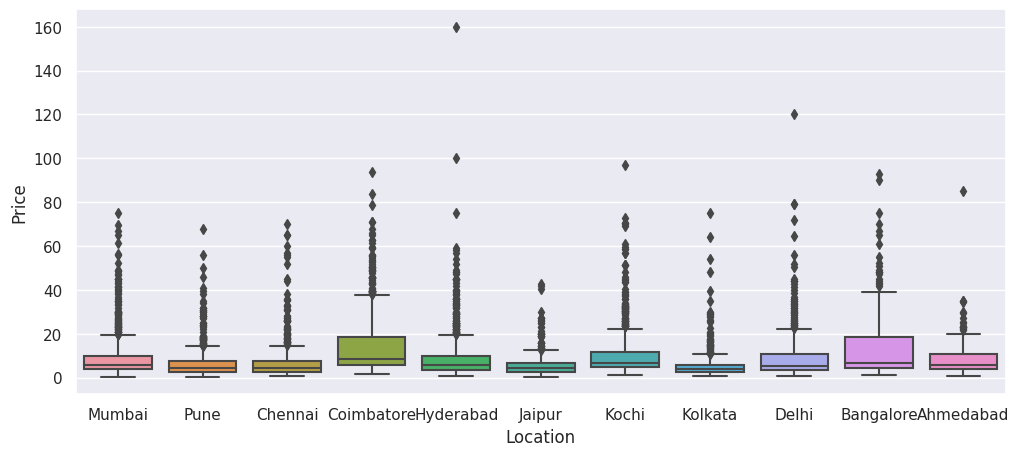

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df1)
plt.show()

* The price of used cars has a large IQR in Coimbatore and Bangalore.

#### `Price` vs `Brand`

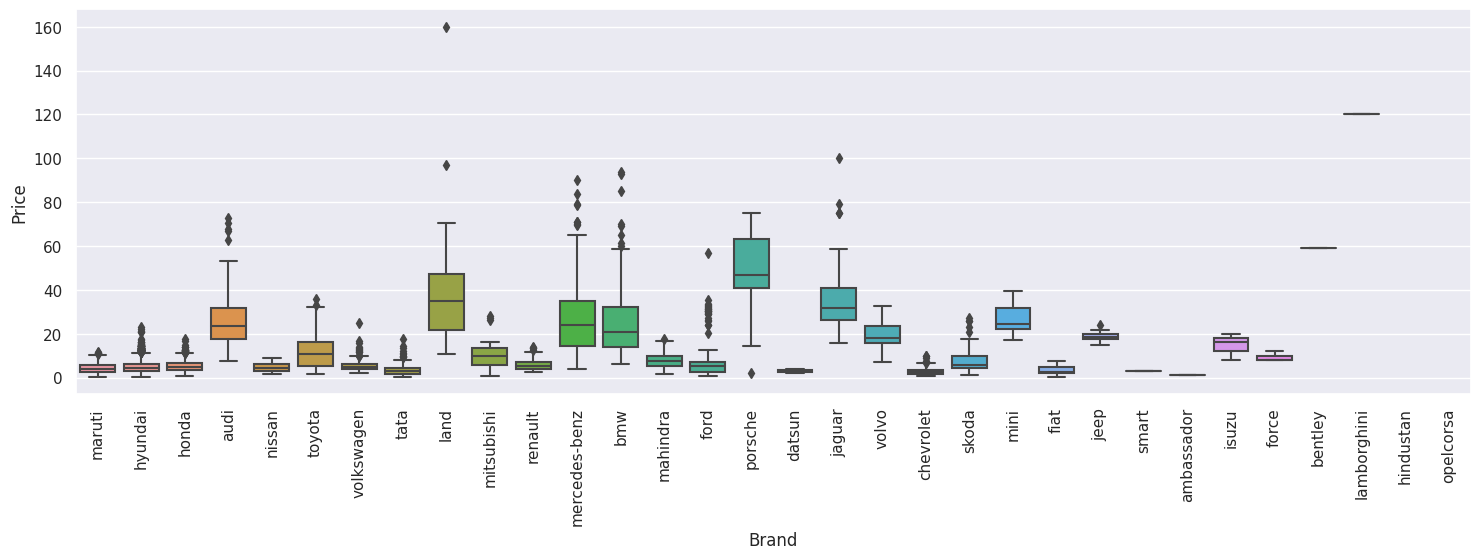

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

* The price of used cars is lower for budget brands like Maruti, Tata, Fiat, etc.
* The price of used cars is higher for premium brands like Porsche, Audi, Lamborghini, etc.

## Data Preprocessing

### Missing Value Treatment

In [ ]:
# let's check again for missing values
df.isnull().sum()

Location        0
Fuel_Type       0
Transmission    0
Owner_Type      0
New_Price       0
Price           0
mileage_num     0
engine_num      0
power_num       0
Brand           0
Model           0
age             0
dtype: int64

In [ ]:
mycols  = ['mileage_num','engine_num', 'power_num']

In [ ]:
for col in mycols:
  df[col] = df.groupby(['Brand','Model'])[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
for col in mycols:
  df[col] = df.groupby(['Brand'])[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.dropna(inplace=True)

**Let's look at a few rows where number of seats is missing.**

In [ ]:
df[df["Seats"].isnull()]

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  \
2369  Chennai            56000.0    Petrol       Manual     Second    NaN   
3882  Kolkata            40000.0    Petrol       Manual     Second    NaN   
5893  Chennai            51000.0    Petrol       Manual     Second    NaN   

      New_Price  Price  mileage_num  engine_num  power_num   Brand   Model  \
2369       7.88   1.50         19.5      1061.0        NaN  maruti  estilo   
3882       7.88   2.50         19.5      1061.0        NaN  maruti  estilo   
5893       7.88   1.75         19.5      1061.0        NaN  maruti  estilo   

      Age  
2369   12  
3882   10  
5893   12

In [ ]:
df.loc[df["Seats"].isnull(), 'Seats']= 5

In [ ]:
for col in mycols:
  df[col] = df.groupby(['Brand'])[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.isna().sum()

Location             0
Kilometers_Driven    1
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
New_Price            0
Price                0
mileage_num          0
engine_num           0
power_num            0
Brand                0
Model                0
Age                  0
dtype: int64

In [ ]:
df.dropna(subset='Kilometers_Driven', inplace=True)

In [ ]:
df.isna().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
New_Price            0
Price                0
mileage_num          0
engine_num           0
power_num            0
Brand                0
Model                0
Age                  0
dtype: int64

In [ ]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand"])[col].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1232
mileage_num             1
engine_num              0
power_num               2
Brand                   0
Model                   0
dtype: int64

* There are still some missing values in `mileage_num` and `power_num`.
* We'll impute these missing values using the column median across the entire data.

In [ ]:
# considering only the data points where price is not missing
df = df[df["Price"].notna()].copy()

# checking for missing values
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
New_Price            0
Price                0
mileage_num          0
engine_num           0
power_num            0
Brand                0
Model                0
dtype: int64

- All missing values are dealt with.

## Model Building - Linear Regression


1. We want to predict the used car price.
2. Before we proceed to build a model, we'll have to encode categorical features.
3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.
4. We will build a Linear Regression model using the train data and then check it's performance.

In [ ]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later

for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Mumbai        790
Hyderabad     741
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: Location, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Diesel      3205
Petrol      2745
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       4298
Automatic    1720
Name: Transmission, dtype: int64
-------------------------------------------------- 

First             4928
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64
-------------------------------------------------- 

maruti           1210
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
Name: Brand, 

Observations:

- Creating dummy variables for the categorical variable `Model`(211) would increase the number of features in the model extensively.

- To check the effect of these dummy variables, we can create two models
     - one with all the variables
     - one without the `Model` dummy variables

- This will allow us to see how the dummy variables affect the performance of the model.

### Model Performance Check

Before moving ahead, we define a function to check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### Data Preparation for modeling with all variables

In [ ]:
# defining the dependent and independent variables
X = df.drop(["Price"], axis=1)
y = df["Price"]

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

New_Price  mileage_num  engine_num  power_num  age  Location_Bangalore  \
0       5.51        26.60       998.0      58.16    9               False   
1      16.06        19.67      1582.0     126.20    4               False   
2       8.61        18.20      1199.0      88.70    8               False   
3      11.27        20.77      1248.0      88.76    7               False   
4      53.14        15.20      1968.0     140.80    6               False   

   Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
0             False                False           False               False   
1             False                False           False               False   
2              True                False           False               False   
3              True                False           False               False   
4             False                 True           False               False   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0            False           False             False             True   
1            False           False             False            False   
2            False           False             False            False   
3            False           False             False            False   
4            False           False             False            False   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  \
0          False             False               False          False   
1           True              True               False          False   
2          False             False               False          False   
3          False              True               False          False   
4          False              True               False          False   

   Fuel_Type_Petrol  Transmission_Manual  Owner_Type_Fourth & Above  \
0             False                 True                      False   
1             False                 True                      False   
2              True                 True                      False   
3             False                 True                      False   
4             False                False                      False   

   Owner_Type_Second  Owner_Type_Third  Brand_audi  Brand_bentley  Brand_bmw  \
0              False             False       False          False      False   
1              False             False       False          False      False   
2              False             False       False          False      False   
3              False             False       False          False      False   
4               True             False        True          False      False   

   Brand_chevrolet  Brand_datsun  Brand_fiat  Brand_force  Brand_ford  \
0            False         False       False        False       False   
1            False         False       False        False       False   
2            False         False       False        False       False   
3            False         False       False        False       False   
4            False         False       False        False       False   

   Brand_honda  Brand_hyundai  Brand_isuzu  Brand_jaguar  Brand_jeep  \
0        False          False        False         False       False   
1        False           True        False         False       False   
2         True          False        False         False       False   
3        False          False        False         False       False   
4        False          False        False         False       False   

   Brand_lamborghini  Brand_land  Brand_mahindra  Brand_maruti  \
0              False       False           False          True   
1              False       False           False         False   
2              False       False           False         False   
3              False       False           False          True   
4              False       False           False         False   

   B

In [ ]:
X.dtypes

New_Price      float64
mileage_num    float64
engine_num     float64
power_num      float64
age              int64
                ...   
Model_xylo        bool
Model_yeti        bool
Model_z4          bool
Model_zen         bool
Model_zest        bool
Length: 260, dtype: object

In [ ]:
X.shape

(6016, 260)

- The dataset X has 264 columns and 6018 rows

In [ ]:
y.sample(700)

2483     7.10
3740     3.00
3971     4.25
5936     6.50
193      8.50
        ...  
794      5.85
5728    10.24
446      7.10
3516     2.10
3233    23.41
Name: Price, Length: 700, dtype: float64

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4211
Number of rows in test data = 1805


### Model Building - Linear Regression with all variables

In [ ]:
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression()

In [ ]:
lin_reg_model1.predict(x_test)

array([1.36113003, 2.19574733, 1.71895112, ..., 8.59417847, 0.7519812 ,
       7.39555969])

In [ ]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = model_performance_regression(
    lin_reg_model1, x_train, y_train
)
lin_reg_model1_perf_train

Training Performance:


RMSE       MAE  R-squared  Adj. R-squared
0  4.137183  2.242457   0.866665        0.857889

In [ ]:
np.mean(y_train)

9.478311564948942

In [ ]:
2.24 / 9.47

0.2365364308342133

* Both the R-squared and Adjusted R squared of our model are high. This is a clear indication that we have been able to create a very good model that is able to explain variance in the price of used cars up to ~87%.

* The model is not an underfitting model.

* Let's do a quick performance check on the test data.

In [ ]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model1_perf_test = model_performance_regression(lin_reg_model1, x_test, y_test)
lin_reg_model1_perf_test

Test Performance:


RMSE       MAE  R-squared  Adj. R-squared
0  4.8117  2.430878   0.800539        0.766951

In [ ]:
df.describe()

Kilometers_Driven        Seats    New_Price        Price  mileage_num  \
count        5953.000000  5953.000000  5953.000000  5953.000000  5953.000000   
mean        56628.853217     5.285066    20.088150     8.856415    18.353519   
std         30947.160766     0.798104    19.894329     9.087311     4.157718   
min           171.000000     2.000000     3.910000     0.440000     7.810000   
25%         34000.000000     5.000000     7.880000     3.500000    15.300000   
50%         53442.000000     5.000000    11.300000     5.550000    18.200000   
75%         73000.000000     5.000000    21.085000     9.660000    21.100000   
max        143222.200000    10.000000    86.970000    43.000000    33.540000   

        engine_num    power_num          Age  
count  5953.000000  5953.000000  5953.000000  
mean   1599.697631   110.257680     6.645725  
std     556.119801    47.577699     3.275947  
min      72.000000    34.200000     1.000000  
25%    1197.000000    74.000000     4.000000  
50%    1462.000000    91.100000     6.000000  
75%    1968.000000   138.030000     9.000000  
max    2993.000000   254.800000    22.000000

* Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) of train and test data are close, which indicates that our model is not overfitting the train data.

* MAE indicates that our current model is able to predict used car prices within a mean error of 4.3 lakhs on test data.

* The units of both RMSE and MAE are the same, Lakhs in this case. But RMSE is greater than MAE because it penalizes the outliers more.


### Data Preparation for modeling without dummy variables for Model

In [ ]:
# defining the dependent and independent variables
X = df.drop(["Price", "Model"], axis=1)
y = df["Price"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4211
Number of rows in test data = 1805


In [ ]:
X.shape

(6016, 51)

### Model Building - Linear Regression without dummy variables for Model


In [ ]:
# fitting a linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression()

In [ ]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train

Training Performance:


RMSE       MAE  R-squared  Adj. R-squared
0  5.243624  2.811946   0.785811        0.783185

In [ ]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


RMSE       MAE  R-squared  Adj. R-squared
0  5.134489  2.833733    0.77288        0.766273

In [ ]:
outputtable = pd.DataFrame()

In [ ]:
outputtable['cols'] = x_train2.columns
outputtable['coeff'] = lin_reg_model2.coef_

In [ ]:
outputtable

cols         coeff
0                   New_Price  1.524806e-01
1                 mileage_num -3.738243e-02
2                  engine_num  1.156860e-03
3                   power_num  7.036428e-02
4                         age -9.555786e-01
5          Location_Bangalore  1.852653e+00
6            Location_Chennai  9.438657e-01
7         Location_Coimbatore  1.887343e+00
8              Location_Delhi -7.899396e-01
9          Location_Hyderabad  1.604624e+00
10            Location_Jaipur  7.761880e-01
11             Location_Kochi -4.636196e-01
12           Location_Kolkata -1.113427e+00
13            Location_Mumbai -7.027499e-01
14              Location_Pune  3.691877e-01
15           Fuel_Type_Diesel -2.394065e-01
16         Fuel_Type_Electric  6.927792e-13
17              Fuel_Type_LPG  9.530184e-01
18           Fuel_Type_Petrol -6.251506e-01
19        Transmission_Manual -7.051445e-03
20  Owner_Type_Fourth & Above  9.297725e-01
21          Owner_Type_Second -6.643845e-01
22           Owner_Type_Third  5.753057e-01
23                 Brand_audi -4.210280e+00
24              Brand_bentley -4.209713e+01
25                  Brand_bmw -5.714804e+00
26            Brand_chevrolet -8.521522e+00
27               Brand_datsun -9.692331e+00
28                 Brand_fiat -7.650172e+00
29                Brand_force -8.206340e+00
30                 Brand_ford -7.647023e+00
31                Brand_honda -8.810770e+00
32              Brand_hyundai -7.813918e+00
33                Brand_isuzu -1.263342e+01
34               Brand_jaguar  1.211798e+00
35                 Brand_jeep -6.706796e+00
36          Brand_lamborghini  7.167482e+01
37                 Brand_land -1.328940e+00
38             Brand_mahindra -9.818485e+00
39               Brand_maruti -6.778774e+00
40        Brand_mercedes-benz -2.655603e+00
41                 Brand_mini  3.824876e+00
42           Brand_mitsubishi -8.946803e+00
43               Brand_nissan -8.357548e+00
44              Brand_porsche -6.960347e+00
45              Brand_renault -8.784044e+00
46                Brand_skoda -9.907118e+00
47                 Brand_tata -8.905252e+00
48               Brand_toyota -7.407865e+00
49           Brand_volkswagen -8.541853e+00
50                Brand_volvo -8.473742e+00

* Both the R-squared and Adjusted R squared of our model are lesser than before and the model is able to explain up to 80% of the variance in the price of used cars.
* MAE indicates that our current model is able to predict used car prices within a mean error of 2.75 lakhs on test data.


### Model Performance Comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model1_perf_train.T, lin_reg_model2_perf_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (without dummy variables for Model)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression (all variables)  \
RMSE                                     4.137183   
MAE                                      2.242457   
R-squared                                0.866665   
Adj. R-squared                           0.857889   

                Linear Regression (without dummy variables for Model)  
RMSE                                                     5.243624      
MAE                                                      2.811946      
R-squared                                                0.785811      
Adj. R-squared                                           0.783185

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model1_perf_test.T, lin_reg_model2_perf_test.T,], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (without dummy variables for Model)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Linear Regression (all variables)  \
RMSE                                     4.811700   
MAE                                      2.430878   
R-squared                                0.800539   
Adj. R-squared                           0.766951   

                Linear Regression (without dummy variables for Model)  
RMSE                                                     5.134489      
MAE                                                      2.833733      
R-squared                                                0.772880      
Adj. R-squared                                           0.766273

**We will consider *lin_reg_model1* (model with all variables) as our final model.**

In [ ]:
residuals = y_train - lin_reg_model2.predict(x_train2)

<Axes: xlabel='Price', ylabel='Density'>

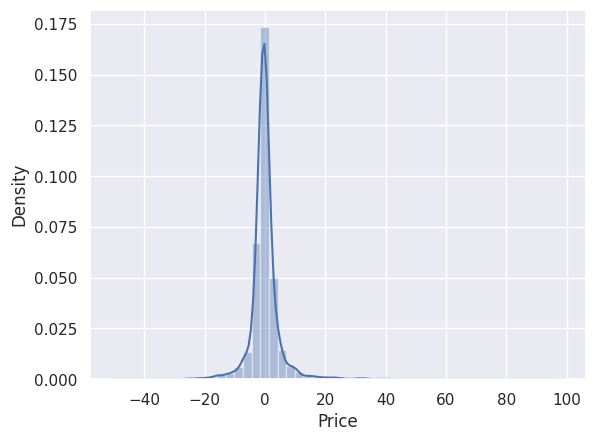

In [ ]:
sns.distplot(residuals, kde=True)

## Business Insights and Recommendations

1. Our linear regression model has successfully explained approximately 83% of the variation in the data.
2. The Mean Absolute Error (MAE) indicates that our current model can predict used car prices with an average error of around 2.38 lakhs on the test data.
3. Our analysis has revealed that certain factors, such as the year of manufacture, the number of seats, and the maximum power of the engine, tend to increase the price of a used car. Conversely, factors like the distance traveled and engine volume tend to decrease the price of a used car.
4. Certain markets tend to have higher prices, and it would be beneficial for Cars4U to focus on these markets and establish offices in these areas if necessary.
5. We need to gather data on the cost side of things before discussing profitability in the business.
6. After analyzing the data, the next step would be to cluster the different data sets and determine whether we should create multiple models for different locations or car types.





## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### `Kilometers_Driven`

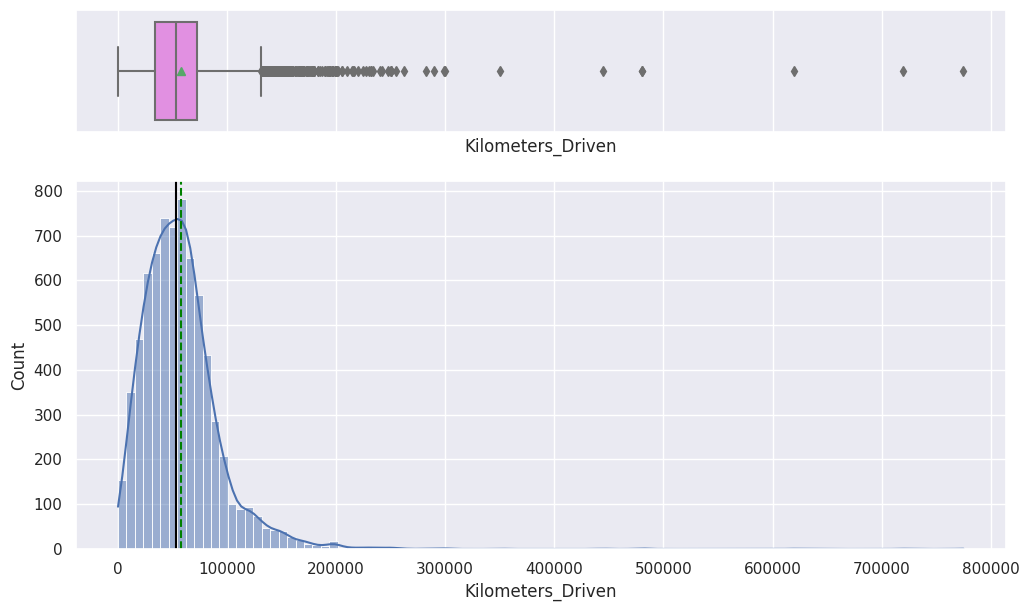

In [ ]:
histogram_boxplot(df1, "Kilometers_Driven", bins=100, kde=True)

**Observations**

* This is another highly skewed distribution.
* Let us use log transformation on this column too.

In [ ]:
df1["kilometers_driven_log"] = np.log(df1["Kilometers_Driven"])

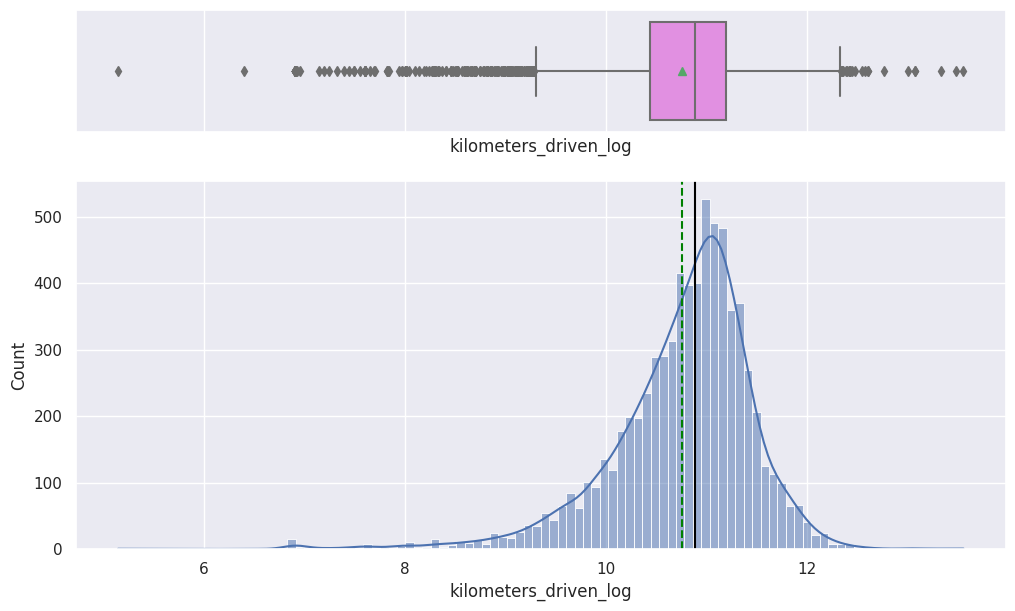

In [ ]:
histogram_boxplot(df1, "kilometers_driven_log", bins=100, kde=True)

* Transformation has reduced the extreme skewness.

#### `mileage_num`

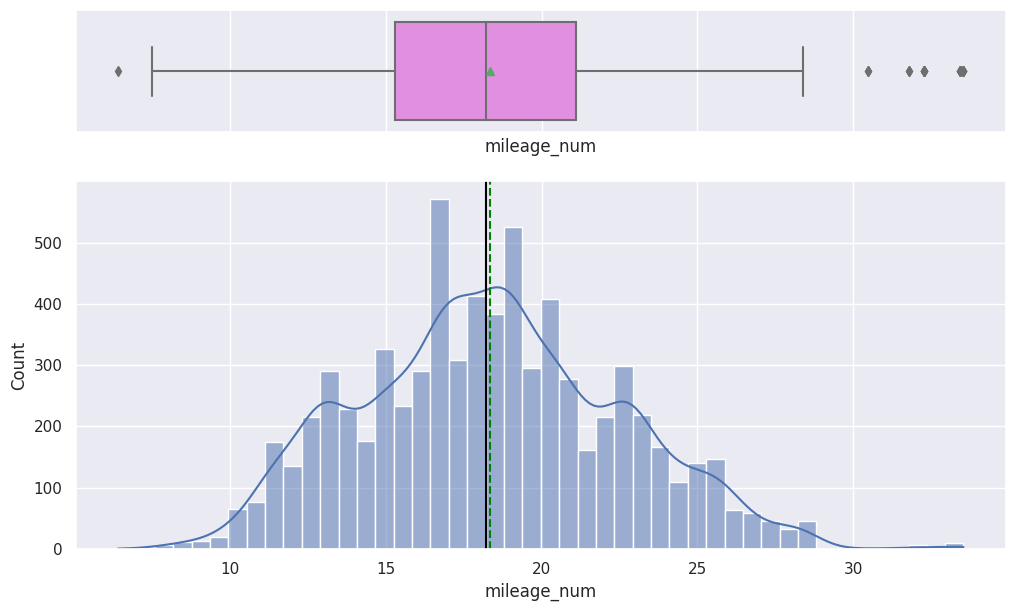

In [ ]:
histogram_boxplot(df1, "mileage_num", kde=True)

**Observations**

* This is a close to normally distributed attribute.

#### `engine_num`

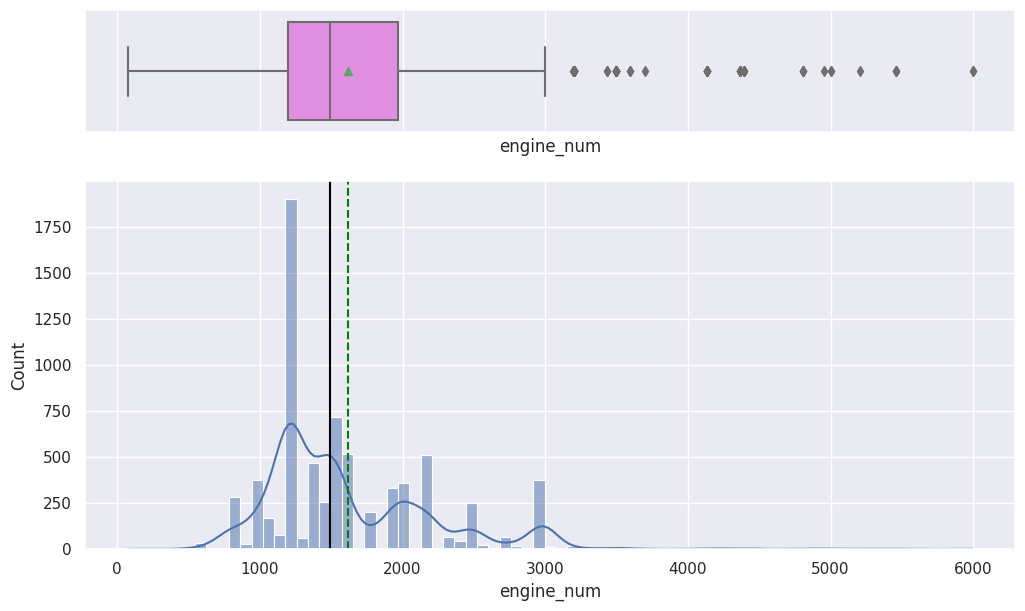

In [ ]:
histogram_boxplot(df1, "engine_num", kde=True)

**Observations**

* There are a few car with a higher engine displacement volume.

#### `power_num`

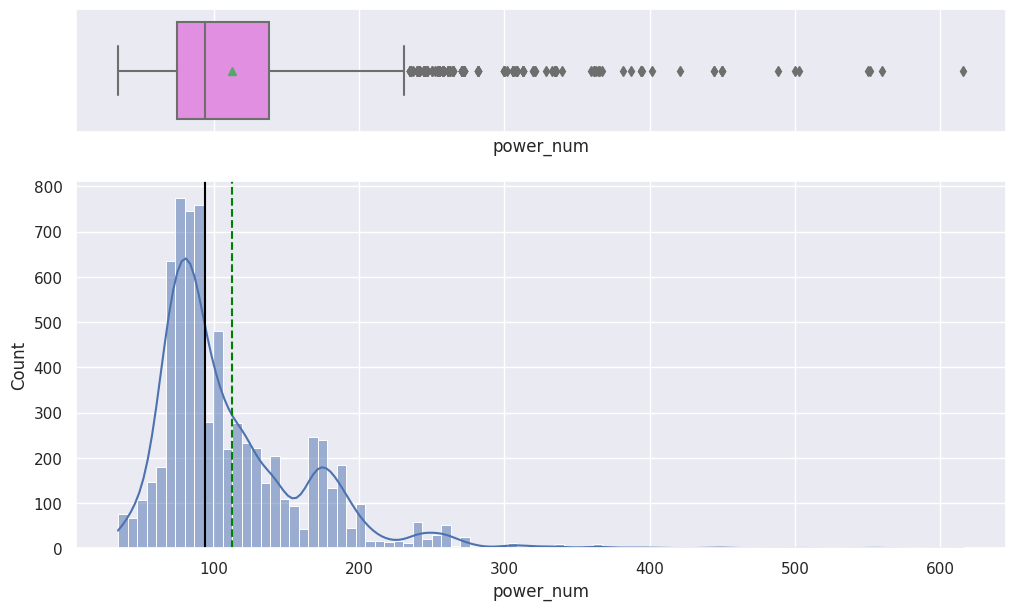

In [ ]:
histogram_boxplot(df1, "power_num", kde=True)

**Observations**

* There are a few car with a higher engine power.

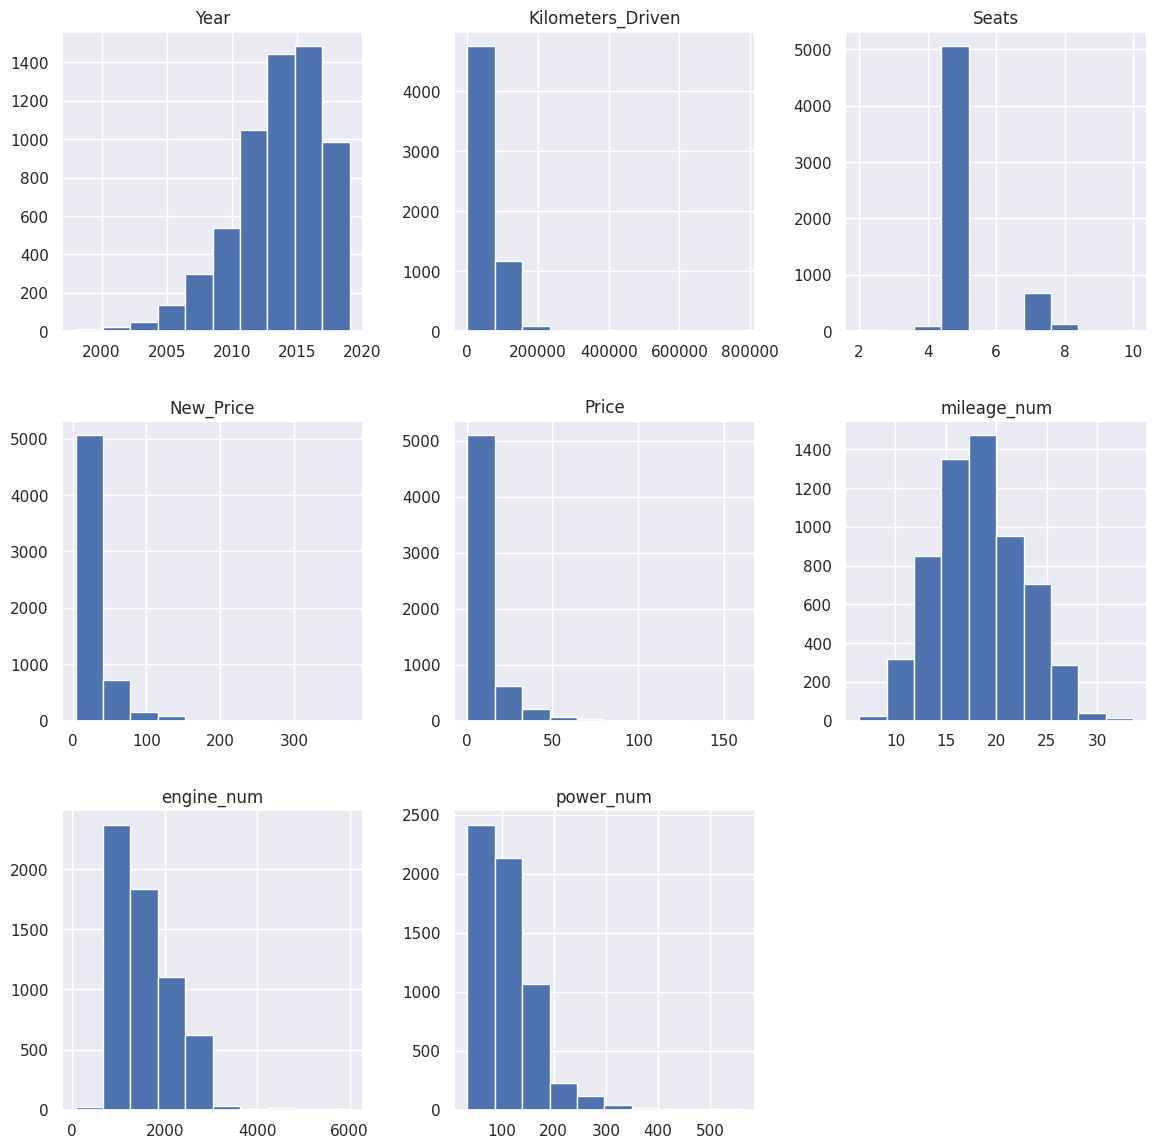

In [ ]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

- `Price`: The price of a used car is the target variable and has a highly skewed distribution, with a median value of around 53.5 lakh INR. The log transformation was applied on this column to reduce skewness. The displacement volume of the engine, the maximum power of the engine and the price of a new car of the same model is highly correlated with the price of a used car.
- `Mileage`: This attribute has a close to normally distribution. With increase in mileage, the engine displacement and power decrease.
- `Engine`: There are a few upper outliers, indicating that there are a few car with a higher engine displacement volume. Higher priced cars have higher engine displacement. It is also highly correlated with the maximum engine power.
- `Power`: There are a few upper outliers, indicating that there are a few car with a higher power. Higher priced cars have higher maximum power. It is also highly correlated with the engine displacement volume.
- `Kilometers_driven`: The number of kilometers a used car is driven has a highly skewed distribution, with a median value of around 53.5 thousand. The log transformation was applied on this column to reduce skewness.
- `New_Price`: The price of a used car is the target variable and has a highly skewed distribution, with a median value of around 11.3 lakh INR. The log transformation was applied on this column to reduce skewness.
- `Seats`: 84% of the cars in the dataset are 5-seater cars.
- `Year`: More than half the cars in the data were manufactured in or after 2014. The price of used cars has increased over the years.
- `Brand`: Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc.
- `Model`: Maruti Swift is the most common car up for resale. The dataset contains used cars from luxury as well as budget-friendly brands.
- `Location`: Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.
- `Fuel_Type`: Around 1% of the cars in the dataset do not run on diesel or petrol. Electric cars have the highest median price, followed by diesel cars.
- `Transmission`: More than 70% of the cars have manual transmission. The price is higher for used cars with automatic transmission.
- `Owner_Type`: More than 80% of the used cars are being sold for the first time. The price of cars decreases as they keep getting resold.

#### `Model`

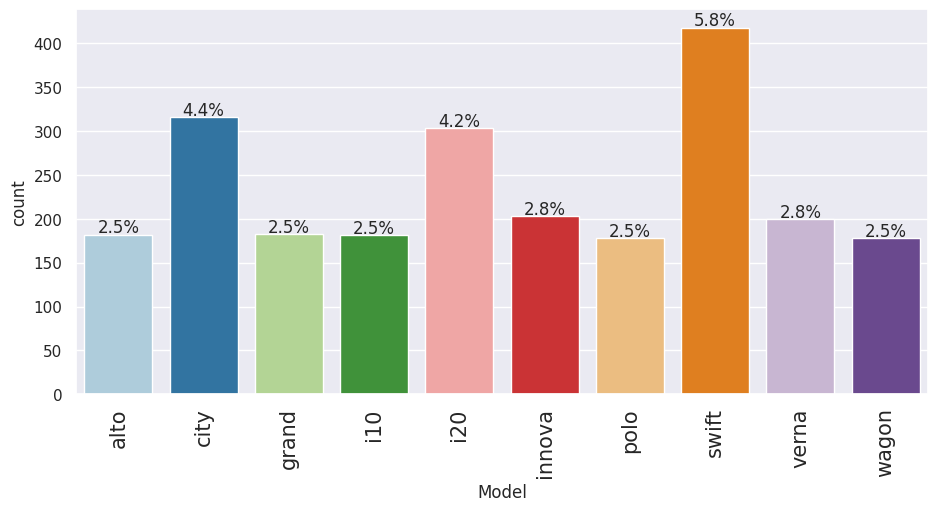

In [ ]:
labeled_barplot(df1, "Model", perc=True, n=10)

**Observations**

* Maruti Swift is the most common car up for resale.

* It is clear from the above charts that our dataset contains used cars from luxury as well as budget-friendly brands.

* We can create a new variable using this information. We can consider binning all our cars into the following 3 categories later:

    1. Budget-Friendly
    2. Mid Range
    3. Luxury Cars

#### `Seats`

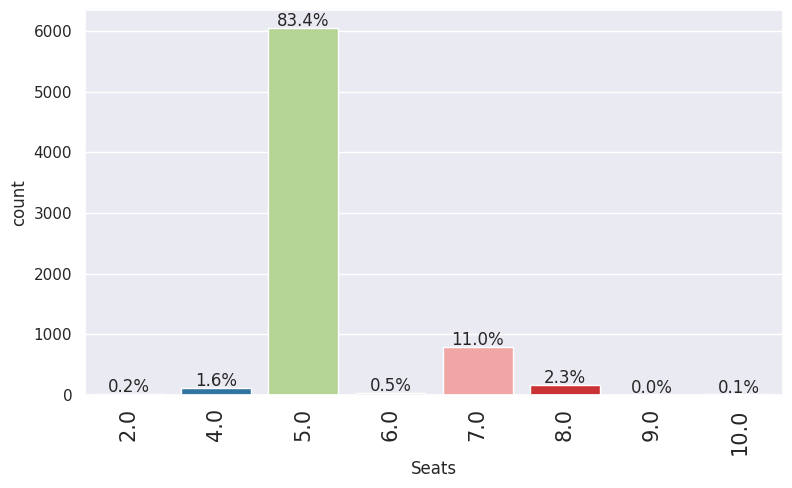

In [ ]:
labeled_barplot(df1, "Seats", perc=True)

* 84% of the cars in the dataset are 5-seater cars.

#### `Year`

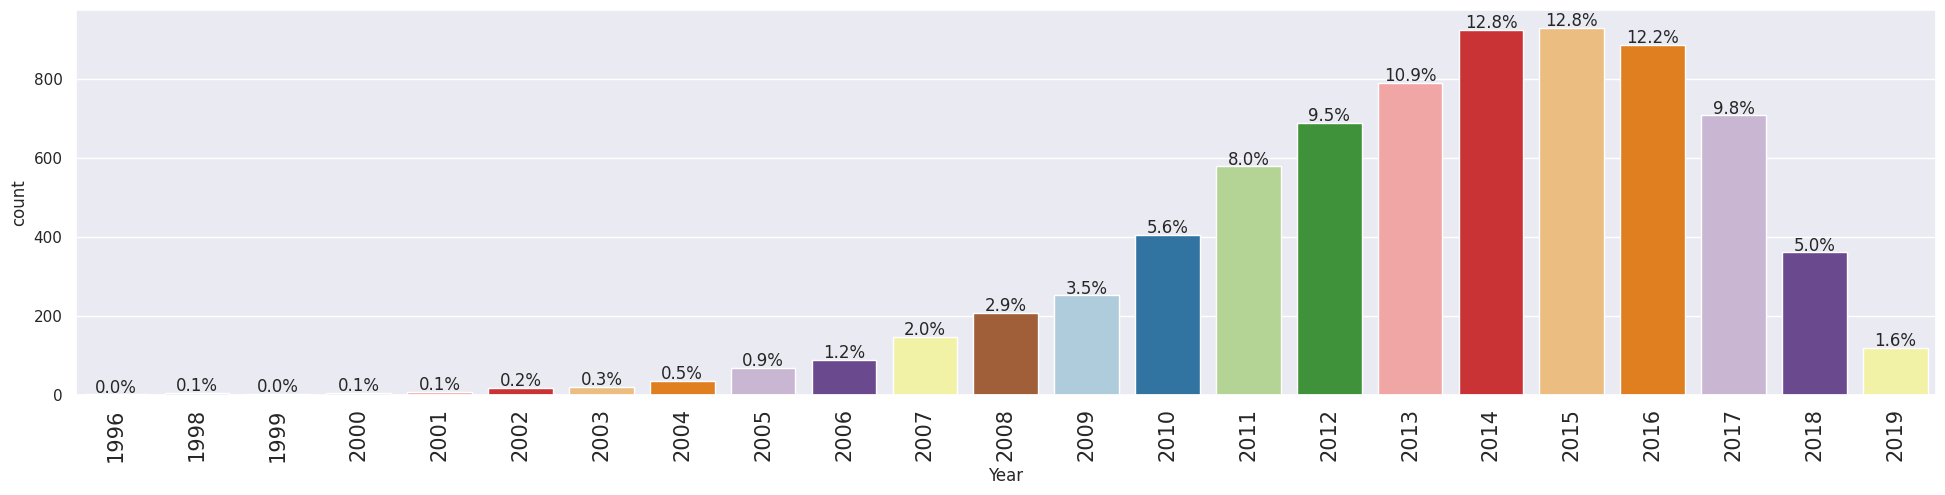

In [ ]:
labeled_barplot(df1, "Year", perc=True)

* More than half the cars in the data were manufactured in or after 2014.

#### `Transmission`

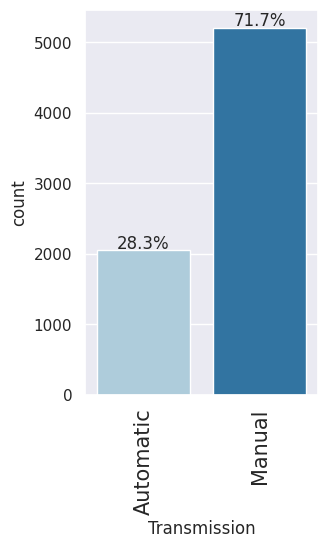

In [ ]:
labeled_barplot(df1, "Transmission", perc=True)

* More than 70% of the cars have manual transmission.

#### `Owner_Type`

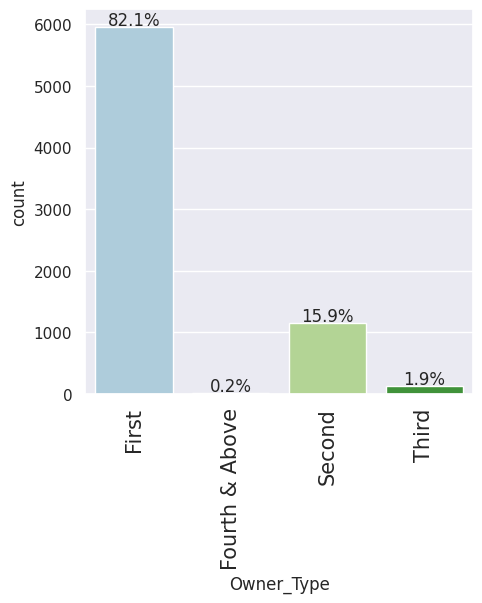

In [ ]:
labeled_barplot(df1, "Owner_Type", perc=True)

* More than 80% of the used cars are being sold for the first time.

### Bivariate Analysis

**Let's check the variation in Price with some of the other variables.**

#### `Price` vs `Transmission`

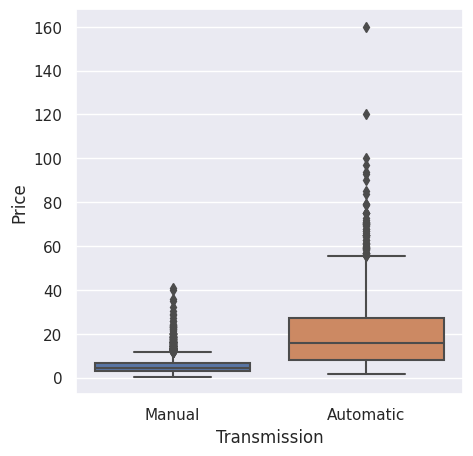

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df)
plt.show()

* The price is higher for used cars with automatic transmission.

#### `Price` vs `Fuel_Type`

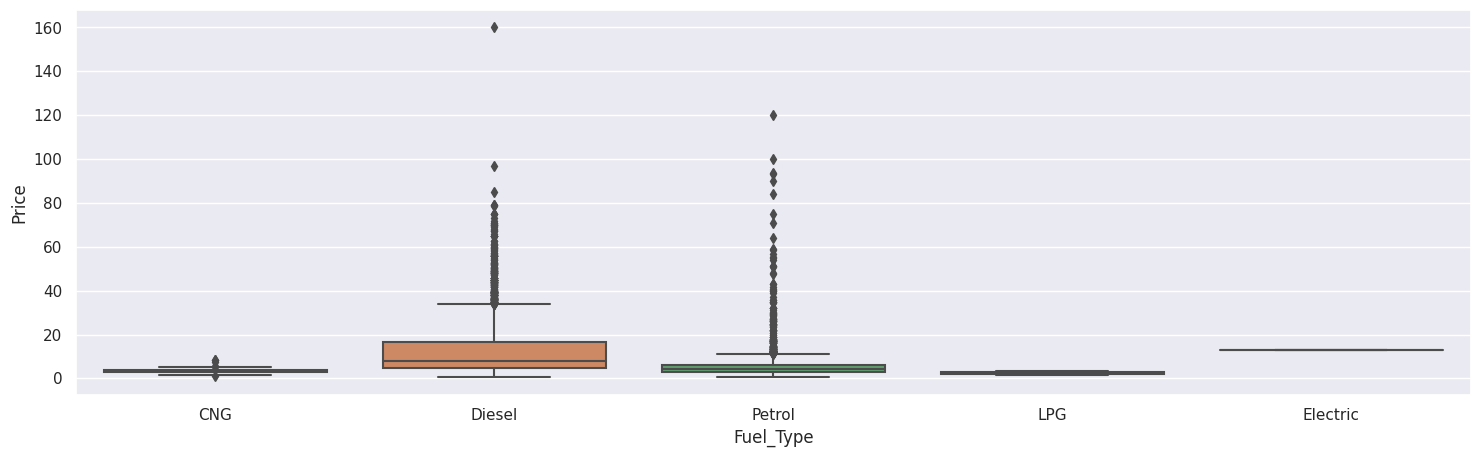

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.show()

* Electric cars have the highest median price, followed by diesel cars.

#### `Price` vs `Brand`

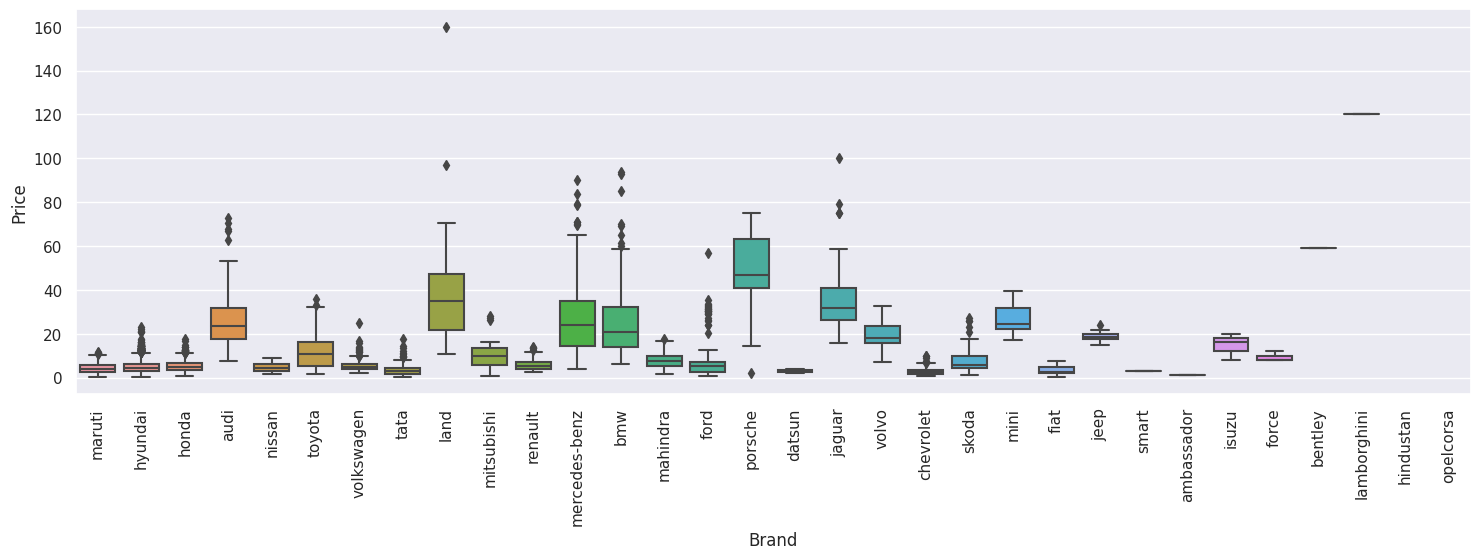

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df1)
plt.xticks(rotation=90)
plt.show()

* The price of used cars is lower for budget brands like Maruti, Tata, Fiat, etc.
* The price of used cars is higher for premium brands like Porsche, Audi, Lamborghini, etc.

#### `Price` vs `Transmission`

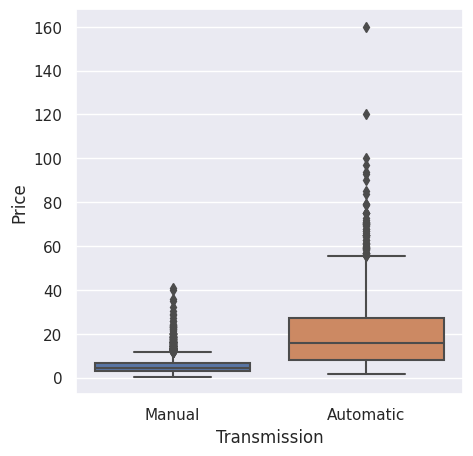

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df1)
plt.show()

* The price is higher for used cars with automatic transmission.

#### `Price` vs `Fuel_Type`

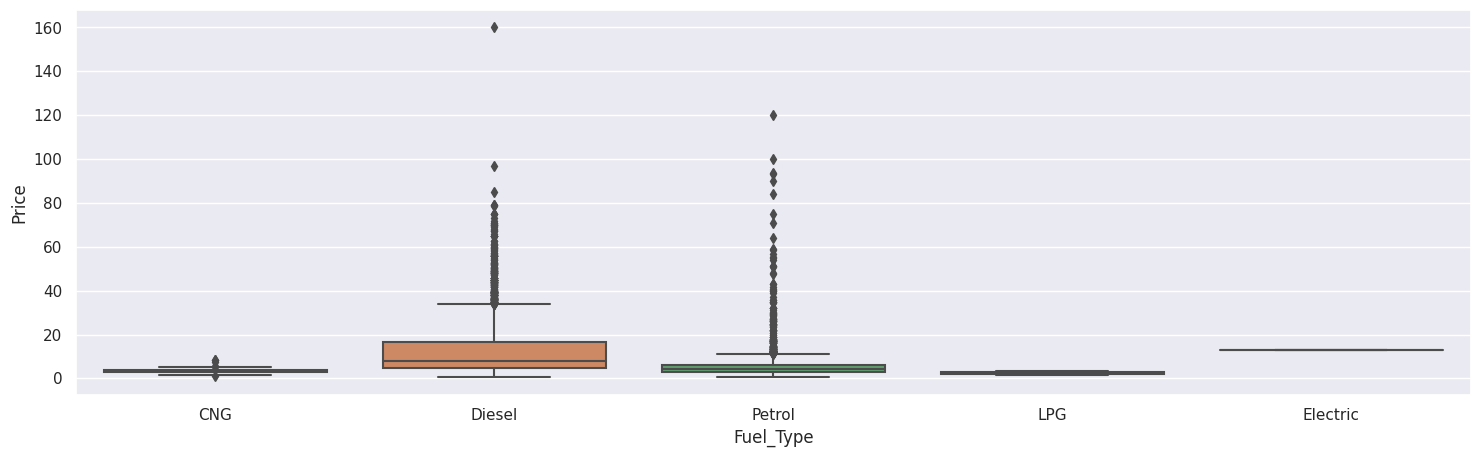

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df1)
plt.show()

* Electric cars have the highest median price, followed by diesel cars.

#### `Price` vs `Owner_Type`

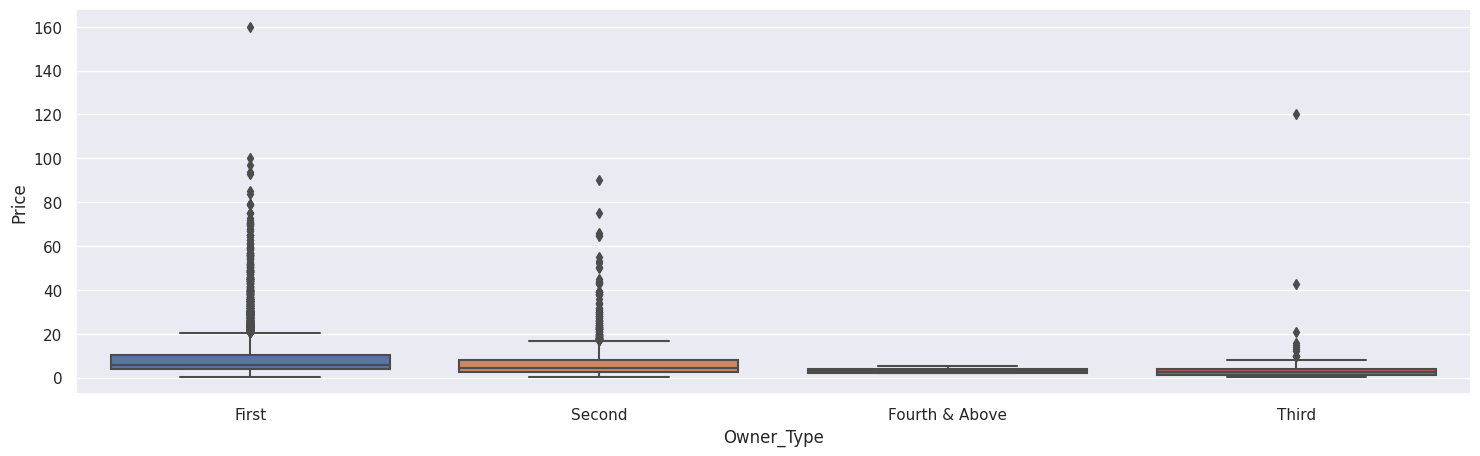

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Owner_Type", y="Price", data=df1)
plt.show()

* The price of cars decreases as they keep getting resold.

#### Pairplot for relations between numerical variables

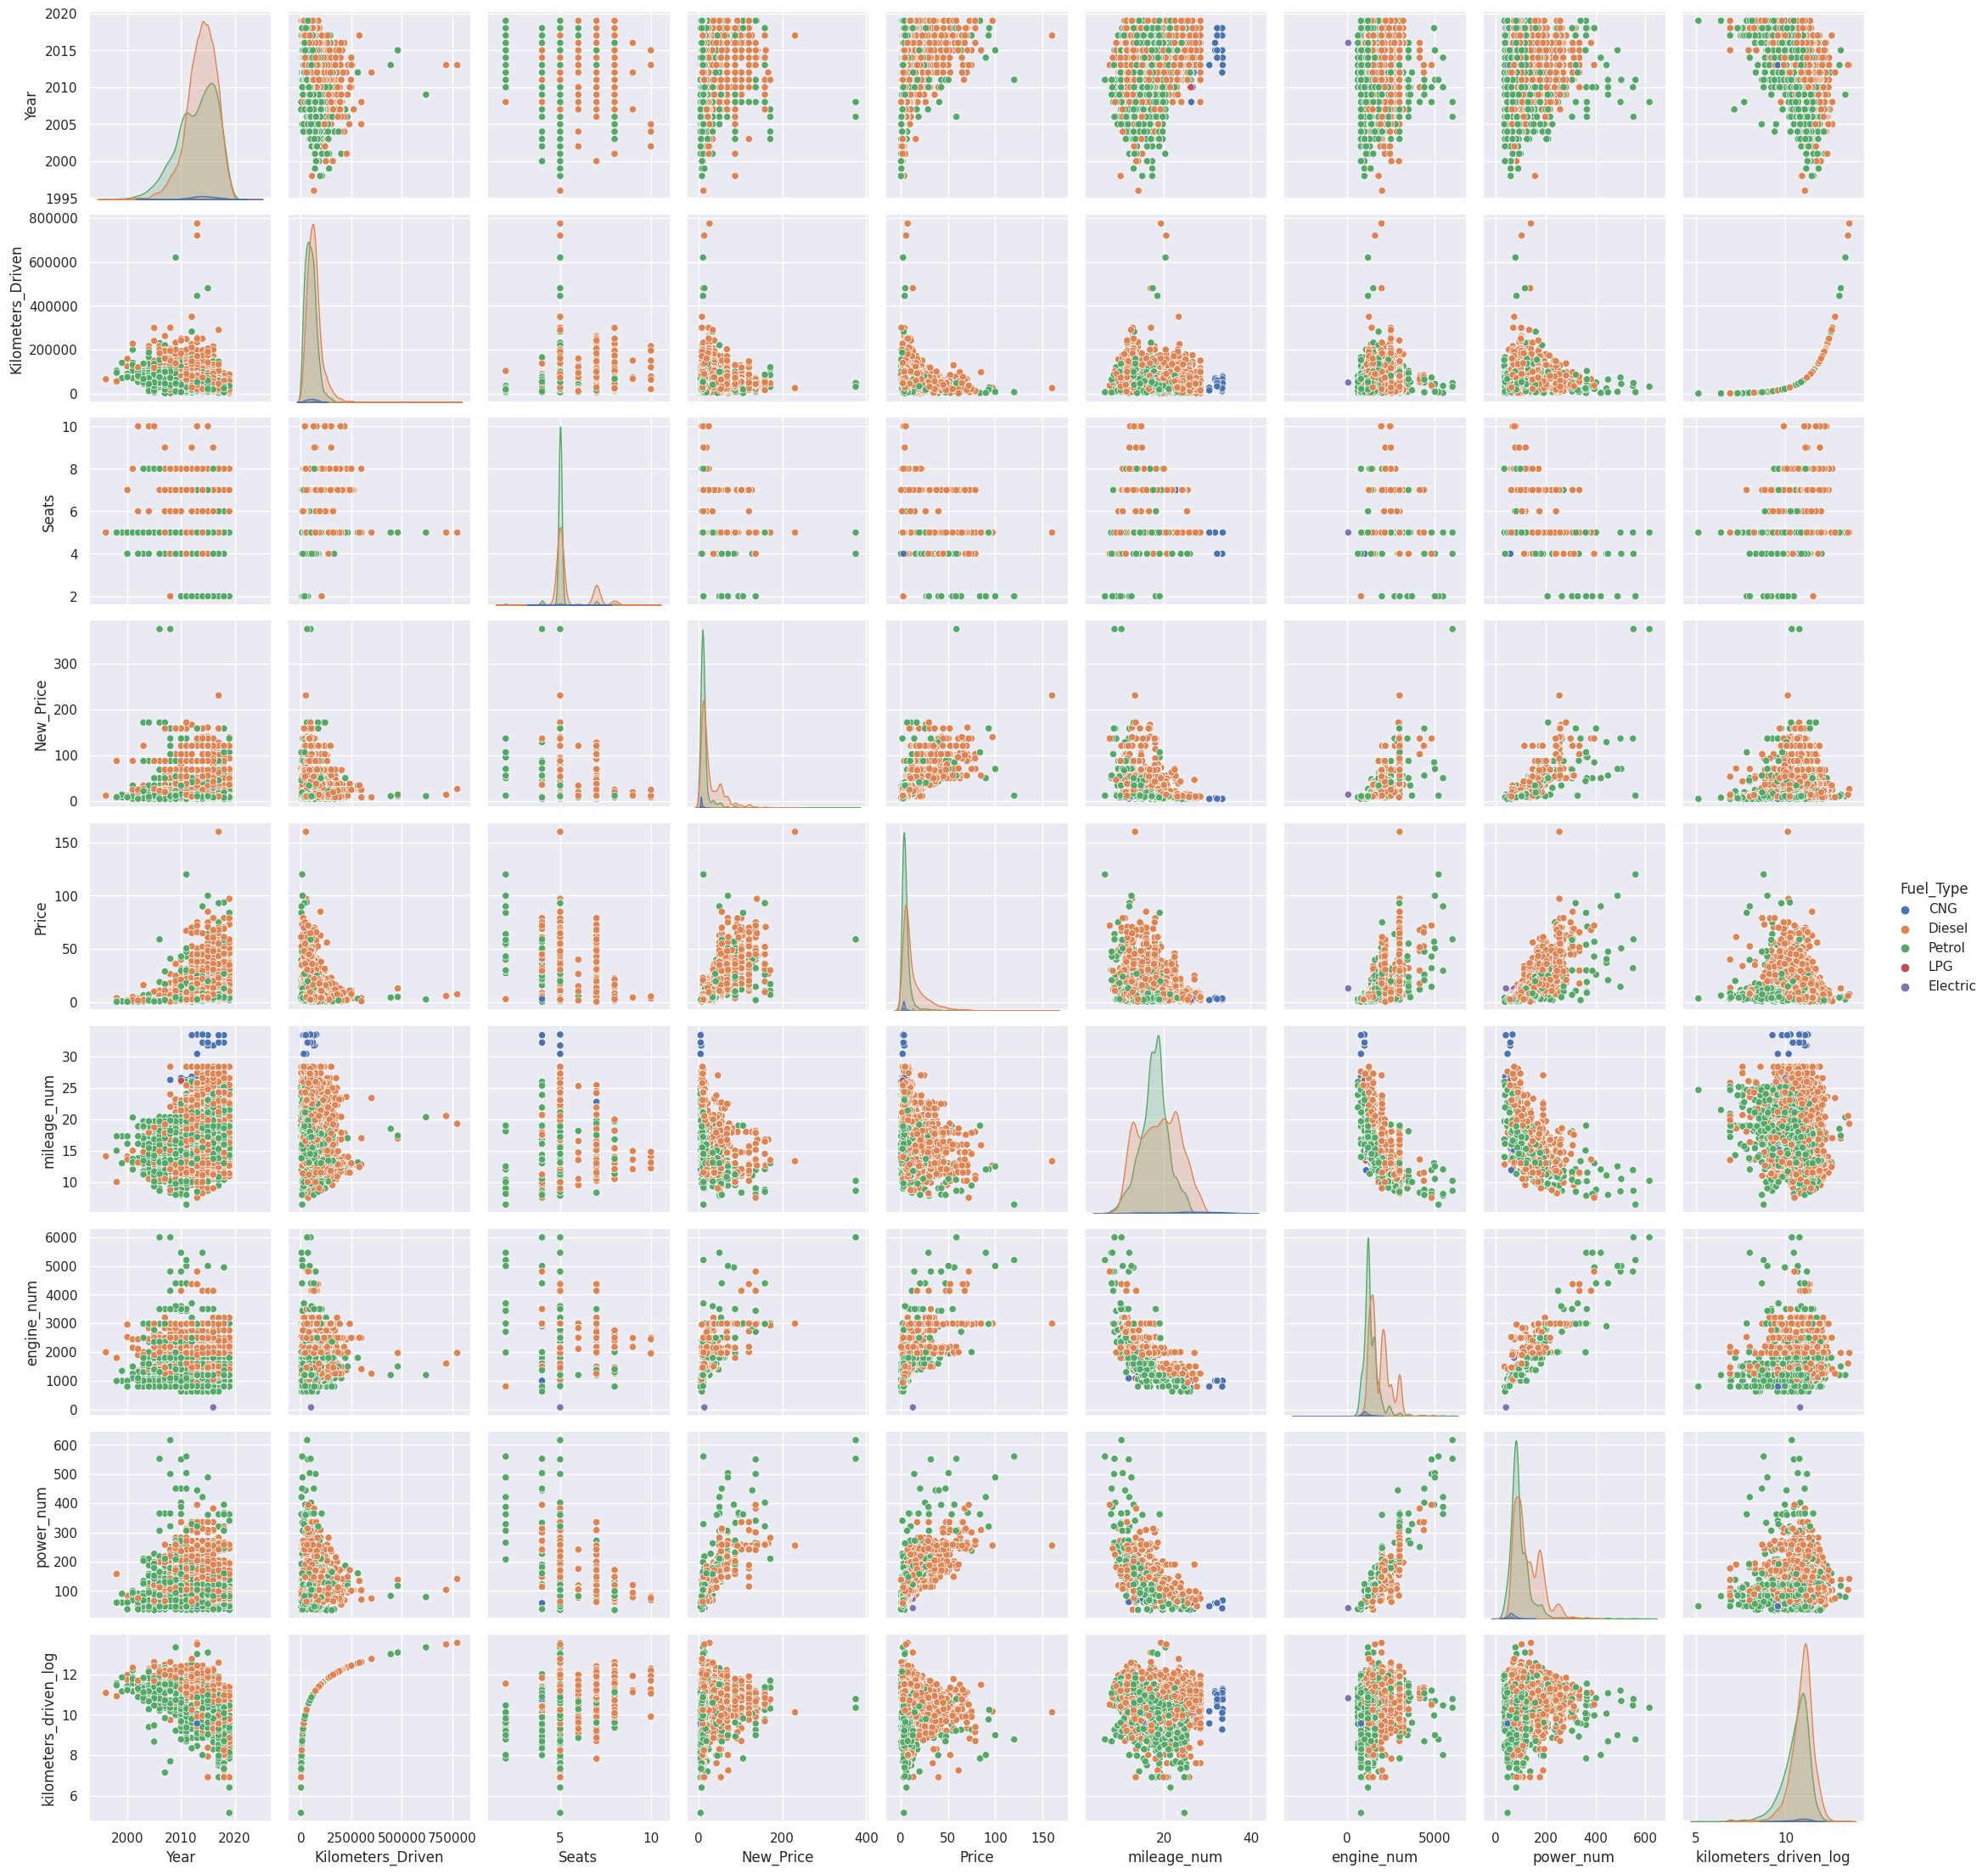

In [ ]:
sns.pairplot(data=df1, hue="Fuel_Type")
plt.show()


Zooming into these plots gives us a lot of information.

- Contrary to intuition, `Kilometers_Driven` does not seem to have a relationship with the price.
- `Price` has a positive relationship with `Year`, i.e., the newer the car, the higher the price.
    - The temporal element of variation is captured in the year column.

- 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
- Mileage does not seem to show much relationship with the price of used cars.
- Engine displacement and power of the car have a positive relationship with the price.
- `New_Price` and used car price are also positively correlated, which is expected.
- `Kilometers_Driven` has a peculiar relationship with the `Year` variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.
- CNG cars are conspicuous outliers when it comes to `Mileage`. The mileage of these cars is very high.
- The mileage and power of newer cars are increasing owing to advancements in technology.
- Mileage has a negative correlation with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.